# Impact of Foreign Players on the success of a Football Team



Major professional clubs in the Premier League choose their players not only from the local pool anymore but also from the global one (David, 2011). This mind shift increases the diversity within the teams. 

In the context of this, I decided to conduct data analysis to see whether there is a trend between team success and the number/percentage of foreign players in a team. To do so, I have chosen the most winning team in the Premier League history, Manchester United (Premier League, 2020), and collected the past 10 seasons of their data containing the team statistics and the player nationalities per season. The data were downloaded as multiple .csv files from an extensive football website, FBREF(https://bit.ly/3nJYjq9), by selecting all 10 seasons separately. 

Since this is English Premiere League, "Foreign players" are considered as those holding nationality not England(ENG). 

There might be some weaknesses and/or caveats in my approach, however, I would like to consider them at the relevant stage in due time if I observe any.






## 1) Libraries, Custom Functions and Default Values

I collected all the libraries necessary for my work under this section. The reasons for why I chose these libraries are listed below.

- **Pandas**: While I was studying for Topic 4 on VLE, I had a chance to take a deep dive into the capabilities of Pandas and noticed the importance of it when it comes to data analysis. Especially its power on working with tabular data took my interest since I have a background in working with databases by using SQL.

- **Seaborn**: I was initially planning to use matplotlib only to visualize my data, however, when I was searching for the data visualization tools I came across seaborn. Because it is still using matplotlib as a base, works well with pandas, and provides user-friendly and informative statistical graphics(Seaborn,2020), I decided to apply it to my work.

- **Glob**: Since I have multiple files having a similar pattern on the file names and data structure, the glob library leveraged my work. 

- **Os**: This library helped me fetch a particular string from a file name so I did not need to use multiple hardcoded values(It will be explained in detail at a stage it has been used.)

In [1]:
import pandas as pd
import seaborn as sns
import glob
import os

***
Instead of writing the same code over and over again, I created functions where necessary. 
All these functions are listed below with in text comments to give details for the logic applied.

In [2]:
#This is the core function which calls 2 other functions needed for cleaning the data.
def main_clean_func (df_func, flag):
    
    df_func = tweak_columns (df_func, flag)
    df_func = tweak_data (df_func, flag)  
    
    return df_func
     
    
    
    
#This function is responsible for changing the column names of an input dataframe into more understandable ones
#and returning a clean dataframe by filtering the columns needed.
def tweak_columns (df_func, flag):
    
    if flag == '1': #work with the data in which the player details exist.
        df_func= df_func.rename(columns={'Pos': 'Position', 'MP': 'Matches_Played', 'Min':'Mins_Played',
                                         'Gls':'Goals', 'Ast':'Assists'}
                               )
        
        df_func = df_func[['Player', 'Nation','Season', 'Position', 
                           'Age', 'Matches_Played','Mins_Played', 
                           'Goals', 'Assists', 'CrdY', 'CrdR' ]]
        
    else : #work with the data in which the team details exist.
        df_func= df_func.rename(columns={'Rk': 'Ranking', 'MP': 'Matches_Played',
                                         'W':'Wins', 'D':'Draws', 'L':'Loses', 
                                         'Top Team Scorer': 'Top_Scorer'}
                               )
        
        df_func = df_func[['Ranking', 'Squad', 'Season',
                           'Matches_Played', 'Wins', 'Draws', 
                           'Loses', 'Top_Scorer']]   
        
    return df_func




#This function is responsible for cleaning the data stored under certain columns.
def tweak_data(df_func, flag):
    
    if flag == '1': #work with the data in which the player details exist.
        df_func = (df_func.assign
                   (Player = df_func.Player.str.split("\\")
                                           .map(lambda x: x[0])
                                           .str.strip()
                    ,Nation=df_func.Nation.str.split(" ")
                                          .map(lambda y: y[1]) 
                   )
                  )  
       
    else : #work with the data in which the team details exist.
                
        df_func = (df_func.assign
                   (Top_Scorer = df_func.Top_Scorer.str.split("-")
                                                   .map(lambda x: x[0])
                                                   .str.strip()
                    ,Top_Scorer_Score = df_func.Top_Scorer.str.split("-")
                                                          .map(lambda x: x[1])
                   )
                  )
        
    
    #drop NaN/Null records from the input data if any exist.
    df_func =  df_func.dropna()
    
    #dropping duplicate rows from the input data if any exist.
    df_func = df_func.drop_duplicates()
    
    return df_func



#This function is responsible for calculating the percentage of a value stored in a certain column 
#for a given dataframe and returning a modified dataframe having a new column in which stores such percentage value.
def percentage_data(df_func, col_value, tot_value, name_of_new_col):
    
    df_func[name_of_new_col] = round(((col_value*100)/tot_value), 2)
    
    return df_func   



***
Constant values are quite useful in case there is a need to use any value multiple times without changing it. 
By using the below constant value, I prevented myself from using hardcoded value on my notebook so my code became more clean.

In [3]:
#Constant values listed here..
ENGLAND = 'ENG'

## 2) Preparing data for analysis

***

Now, fetching data for Manchester United only for 2018-2019.. 

As it is shown in the output below, I need to do some cleaning to make it ready for the data analysis. 

Some issues are listed above:

- Player names are written double and delimited by '\\'
- Nation names are written double
- Not all column names are understandable. 
- No need to have all the columns in place.

***


In [4]:
df_mUtd_20192020= pd.read_csv('data/manchesterunited_2019_2020.csv')

df_mUtd_20192020.head()


,Player,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,PK,...,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA,Matches
0,David de Gea\David-de-Gea,es ESP,GK,28,38,38,3420.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches
1,Harry Maguire\Harry-Maguire,eng ENG,DF,26,38,38,3420.0,1.0,1.0,0.0,...,0.05,2.0,2.0,0.6,0.05,0.01,0.07,0.05,0.07,Matches
2,Victor Lindelöf\Victor-Lindelof,se SWE,DF,25,35,35,3092.0,1.0,0.0,0.0,...,0.03,0.4,0.4,0.3,0.01,0.01,0.02,0.01,0.02,Matches
3,Aaron Wan-Bissaka\Aaron-Wan-Bissaka,eng ENG,DF,21,35,34,3070.0,0.0,4.0,0.0,...,0.12,0.9,0.9,2.9,0.03,0.08,0.11,0.03,0.11,Matches
4,Marcus Rashford\Marcus-Rashford,eng ENG,FW,21,31,31,2643.0,17.0,7.0,6.0,...,0.61,17.3,11.2,4.6,0.59,0.16,0.74,0.38,0.54,Matches


In [5]:
df_stats_20192020 = pd.read_csv('data/Stats__2019_2020.csv')

df_stats_20192020.head()

,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,xG,xGA,xGDiff,xGDiff/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,38,32,3,3,85,33,52,99,71.5,40.0,31.5,0.83,41955,Mohamed Salah - 19,Alisson,→ UEFA Champions League via league finish
1,2,Manchester City,38,26,3,9,102,35,67,81,93.0,34.7,58.3,1.53,37097,Raheem Sterling - 20,Ederson,→ UEFA Champions League via league finish
2,3,Manchester Utd,38,18,12,8,66,36,30,66,59.4,37.4,22.0,0.58,57415,Marcus Rashford Anthony Martial - 17,David de Gea,→ UEFA Champions League via league finish
3,4,Chelsea,38,20,6,12,69,54,15,66,66.6,37.9,28.6,0.75,32023,Tammy Abraham - 15,Kepa Arrizabalaga,→ UEFA Champions League via league finish
4,5,Leicester City,38,18,8,12,67,41,26,62,61.6,44.5,17.1,0.45,25312,Jamie Vardy - 23,Kasper Schmeichel,→ UEFA Europa League via league finish


***

As such, in the coming cells, I call the functions that I have written above to tweak the table and the data inside...

***


In [6]:
csv_files = glob.glob('data/Stats*csv')

lst_of_df_stats = []

for file in csv_files:
    
    df_stats = pd.read_csv(file)
    df_stats['Season'] = (os.path.basename(file)
                                 .split("__")[1].split('.')[0]
                                 .replace("_", "-") 
                         )
    lst_of_df_stats.append(df_stats)
  
    
if not len(lst_of_df_stats):
    raise Exception("Files have not been read successfully. Please ensure your files are in place.")
    
    
df_all_stats = pd.concat(lst_of_df_stats, ignore_index=True)

df_all_mUtd_stats = (df_all_stats.loc[df_all_stats.Squad =='Manchester Utd']
                                 .reset_index(drop=True)
                    ).copy()

df_all_mUtd_stats_clean = main_clean_func(df_all_mUtd_stats ,'2')




***
Let me check how the dataframes for the squads in my list now look like
***

In [7]:
df_all_mUtd_stats_clean.head()



,Ranking,Squad,Season,Matches_Played,Wins,Draws,Loses,Top_Scorer,Top_Scorer_Score
0,1,Manchester Utd,2010-2011,38,23,11,4,Dimitar Berbatov,20
1,2,Manchester Utd,2011-2012,38,28,5,5,Wayne Rooney,27
2,1,Manchester Utd,2012-2013,38,28,5,5,Robin van Persie,26
3,7,Manchester Utd,2013-2014,38,19,7,12,Wayne Rooney,17
4,4,Manchester Utd,2014-2015,38,20,10,8,Wayne Rooney,12


***

All good now.. I need to do the same for the files having the nationalities of the players..

***

In [8]:
csv_files = glob.glob('data/manchesterunited*csv')

lst_of_df_seasons= []

for file in csv_files:
 
    df_mUtd = pd.read_csv(file)
    
    file_name_divided = os.path.basename(file).split("_")
    
    df_mUtd['Season'] = (file_name_divided[1]  
                         + '-' 
                         + file_name_divided[2].split(".")[0]
                        )
    
    lst_of_df_seasons.append(df_mUtd)
    
if not len(lst_of_df_seasons):
    raise Exception("Files have not been read successfully. Please ensure your files are in place.")

    
df_all_seasons_mUtd = pd.concat(lst_of_df_seasons, ignore_index=True)

df_all_seasons_mUtd_clean = main_clean_func(df_all_seasons_mUtd ,'1')


***

Let me check how new dataframe looks like...

***

In [9]:
df_all_seasons_mUtd_clean.head()

,Player,Nation,Season,Position,Age,Matches_Played,Mins_Played,Goals,Assists,CrdY,CrdR
0,Nemanja Vidić,SRB,2010-2011,DF,28,35,3116.0,5.0,1.0,7.0,1.0
1,Patrice Evra,FRA,2010-2011,DF,29,35,2957.0,1.0,0.0,1.0,0.0
2,Edwin van der Sar,NED,2010-2011,GK,39,33,2970.0,0.0,0.0,1.0,0.0
3,Nani,POR,2010-2011,FWMF,23,33,2659.0,9.0,14.0,1.0,0.0
4,Wayne Rooney,ENG,2010-2011,FWMF,24,28,2225.0,11.0,11.0,5.0,0.0


***

What I will do now is that I will calculate the percentage of the foreign players in the team per season and assign this info to the "df_all_stats" as a new column..

First of all, I will calculate the number of the foreign players and total number of the players per season..


***

In [10]:
df_players_with_percentage= (df_all_seasons_mUtd_clean[~(df_all_seasons_mUtd_clean.Nation== ENGLAND)]
                             .groupby(['Season'])
                             .count() 
                            )

df_players_with_percentage ['Total_Num_Players'] = (df_all_seasons_mUtd_clean.groupby('Season')
                                                                              .count()['Player']
                                                   )

df_players_with_percentage = df_players_with_percentage[[ 'Player', 'Total_Num_Players']]

df_players_with_percentage


,Player,Total_Num_Players
Season,,
2010-2011,20,29
2011-2012,18,31
2012-2013,15,25
2013-2014,21,30
2014-2015,20,33
2015-2016,20,33
2016-2017,19,31
2017-2018,19,27
2018-2019,19,28


***

I will change the column name from nation to 'Number of Foreign players' and select only the columns relevant to me..

***


In [11]:
df_players_with_percentage = df_players_with_percentage.rename(columns={'Player': 'Num_Foreign_Players'})

df_players_with_percentage = df_players_with_percentage[[ 'Num_Foreign_Players', 'Total_Num_Players']]


df_players_with_percentage

,Num_Foreign_Players,Total_Num_Players
Season,,
2010-2011,20,29
2011-2012,18,31
2012-2013,15,25
2013-2014,21,30
2014-2015,20,33
2015-2016,20,33
2016-2017,19,31
2017-2018,19,27
2018-2019,19,28


***

Now, let me find out the percentage now and add it to the same dataframe...


***

In [12]:
df_players_with_percentage = percentage_data(df_players_with_percentage
                                             ,df_players_with_percentage.Num_Foreign_Players
                                             ,df_players_with_percentage.Total_Num_Players
                                             ,'Percentage_of_Foreign_Players')

                                                                                        
df_players_with_percentage

,Num_Foreign_Players,Total_Num_Players,Percentage_of_Foreign_Players
Season,,,
2010-2011,20,29,68.97
2011-2012,18,31,58.06
2012-2013,15,25,60.00
2013-2014,21,30,70.00
2014-2015,20,33,60.61
2015-2016,20,33,60.61
2016-2017,19,31,61.29
2017-2018,19,27,70.37
2018-2019,19,28,67.86


***

I will add team score to the same table...

***

In [13]:
df_all_mUtd_stats_clean_index_changed = df_all_mUtd_stats_clean.set_index('Season').copy()

df_players_with_percentage = pd.merge(df_players_with_percentage
                                      ,df_all_mUtd_stats_clean_index_changed
                                      ,left_index=True
                                      ,right_index=True)




In [14]:
df_players_with_percentage = df_players_with_percentage [['Num_Foreign_Players'
                                                        ,'Total_Num_Players'
                                                        ,'Percentage_of_Foreign_Players'
                                                        ,'Wins'
                                                        ,'Ranking']]

df_players_with_percentage = df_players_with_percentage.rename (columns={'Wins': 'Team_Score'})

df_players_with_percentage

,Num_Foreign_Players,Total_Num_Players,Percentage_of_Foreign_Players,Team_Score,Ranking
Season,,,,,
2010-2011,20,29,68.97,23,1
2011-2012,18,31,58.06,28,2
2012-2013,15,25,60.00,28,1
2013-2014,21,30,70.00,19,7
2014-2015,20,33,60.61,20,4
2015-2016,20,33,60.61,19,5
2016-2017,19,31,61.29,18,6
2017-2018,19,27,70.37,25,2
2018-2019,19,28,67.86,19,6


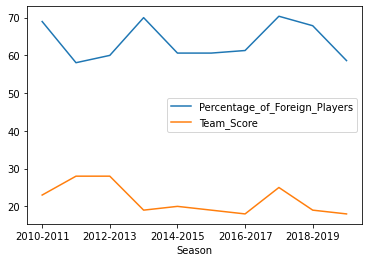

In [15]:
df_players_with_percentage[['Percentage_of_Foreign_Players','Team_Score']].plot()



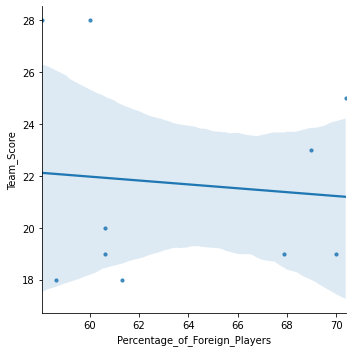

In [16]:
sns.lmplot('Percentage_of_Foreign_Players'
           ,'Team_Score'
           ,data=df_players_with_percentage
           ,fit_reg=True
           ,scatter_kws={"marker": "D"
                        ,"s": 10})



*** 

All 2 graphs above does not tell us anything clearly. Let me calculate the correlation between these 2 variables: 

***

In [17]:
df_players_with_percentage.Percentage_of_Foreign_Players.corr(df_players_with_percentage.Team_Score)


-0.093838775262962

***

It is now obvious that there is a very weak negative correlation that is so close to 0 between the percentage of the foreign players in Manchester Utd and the number of the points they have scored..  In other words, there is no any obvious correlation statistically observed for this step..

***



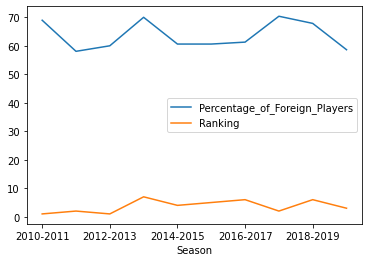

In [18]:
df_players_with_percentage[['Percentage_of_Foreign_Players','Ranking']].plot()


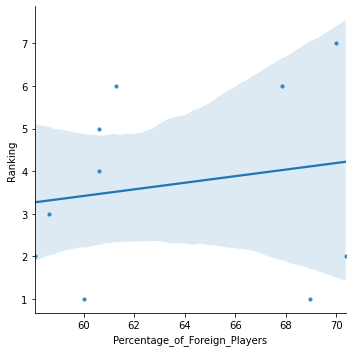

In [19]:
sns.lmplot('Percentage_of_Foreign_Players'
           ,'Ranking'
           ,data=df_players_with_percentage
           ,fit_reg=True
           ,scatter_kws={"marker": "D"
                        ,"s": 10})


In [20]:
df_players_with_percentage.Percentage_of_Foreign_Players.corr(df_players_with_percentage.Ranking)

0.17488241635449112

An increase but still weak correlation even though it looks positive..

***

Let's check it further by finding out the  between the number of the goals that the foreign players hold and the total number of the points that the team scored..

I will first check if the total number of the goals achieved by both English players and others..

***

In [21]:
df_all_seasons_mUtd_clean

,Player,Nation,Season,Position,Age,Matches_Played,Mins_Played,Goals,Assists,CrdY,CrdR
0,Nemanja Vidić,SRB,2010-2011,DF,28,35,3116.0,5.0,1.0,7.0,1.0
1,Patrice Evra,FRA,2010-2011,DF,29,35,2957.0,1.0,0.0,1.0,0.0
2,Edwin van der Sar,NED,2010-2011,GK,39,33,2970.0,0.0,0.0,1.0,0.0
3,Nani,POR,2010-2011,FWMF,23,33,2659.0,9.0,14.0,1.0,0.0
4,Wayne Rooney,ENG,2010-2011,FWMF,24,28,2225.0,11.0,11.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
309,Diogo Dalot,POR,2019-2020,DF,20,4,67.0,0.0,0.0,0.0,0.0
310,Odion Ighalo,NGA,2019-2020,FW,30,11,101.0,0.0,0.0,0.0,0.0
311,Tahith Chong,NED,2019-2020,FWMF,19,3,37.0,0.0,0.0,0.0,0.0
312,Angel Gomes,ENG,2019-2020,MF,18,2,21.0,0.0,0.0,0.0,0.0


***
First, English players..
***

In [22]:
df_goals_English = df_all_seasons_mUtd_clean.loc[df_all_seasons_mUtd_clean.Nation==ENGLAND]
df_goals_English = (df_goals_English.groupby('Season')
                                    .sum()[['Goals']]
                   )

df_goals_English

,Goals
Season,
2010-2011,14.0
2011-2012,50.0
2012-2013,19.0
2013-2014,34.0
2014-2015,20.0
2015-2016,18.0
2016-2017,13.0
2017-2018,21.0
2018-2019,18.0


***
Second, others...
***

In [23]:
df_goals_Others = df_all_seasons_mUtd_clean.loc[~(df_all_seasons_mUtd_clean.Nation==ENGLAND)]


df_goals_Others = (df_goals_Others.groupby('Season')
                                  .sum()[['Goals']]
                  )

df_goals_Others

,Goals
Season,
2010-2011,61.0
2011-2012,37.0
2012-2013,61.0
2013-2014,29.0
2014-2015,40.0
2015-2016,28.0
2016-2017,41.0
2017-2018,46.0
2018-2019,47.0


***

Merging these 2 tables to before plotting and calculate the percentage of the goals for both English and foreign players..

***

In [24]:
#Renaming the 'Goals' columns before merging...
df_goals_English= df_goals_English.rename(columns={'Goals': 'Goals_English'})
df_goals_Others = df_goals_Others.rename(columns={'Goals': 'Goals_Others'})

#Now merging 2 dataframes aboved based on index, which is 'Season'..
df_goals_all_nations = pd.merge(df_goals_English, df_goals_Others, left_index=True, right_index=True)


df_goals_all_nations




,Goals_English,Goals_Others
Season,,
2010-2011,14.0,61.0
2011-2012,50.0,37.0
2012-2013,19.0,61.0
2013-2014,34.0,29.0
2014-2015,20.0,40.0
2015-2016,18.0,28.0
2016-2017,13.0,41.0
2017-2018,21.0,46.0
2018-2019,18.0,47.0


***

Percentage calculation..


***

In [25]:
#finding out percentage of each one..
df_goals_all_nations = percentage_data(df_goals_all_nations
                                       ,df_goals_all_nations.Goals_English
                                       , (df_goals_all_nations.Goals_English 
                                          + df_goals_all_nations.Goals_Others)
                                       ,'Percentage_of_Goals_English'
                                      ) 
 
df_goals_all_nations = percentage_data(df_goals_all_nations
                                      ,df_goals_all_nations.Goals_Others
                                      ,(df_goals_all_nations.Goals_English 
                                        + df_goals_all_nations.Goals_Others)
                                      ,'Percentage_of_Goals_Others')


#fetching only the percentage values since the goal values are not needed anymore..
df_goals_all_nations = df_goals_all_nations [['Percentage_of_Goals_English', 'Percentage_of_Goals_Others']]


df_goals_all_nations

,Percentage_of_Goals_English,Percentage_of_Goals_Others
Season,,
2010-2011,18.67,81.33
2011-2012,57.47,42.53
2012-2013,23.75,76.25
2013-2014,53.97,46.03
2014-2015,33.33,66.67
2015-2016,39.13,60.87
2016-2017,24.07,75.93
2017-2018,31.34,68.66
2018-2019,27.69,72.31


***
I will plot a barchar to compare these 2 columns to get a visual insight..
***

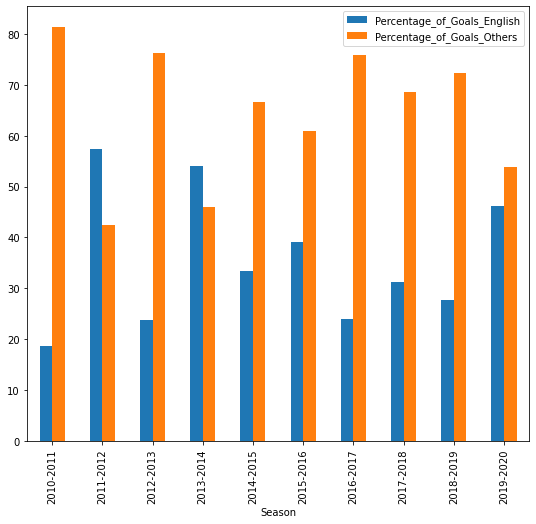

In [26]:
df_goals_all_nations.plot(kind='bar', figsize=(9,8))

***

This graph shows that based on the data that I have used, except for Seasons 2011-2012 and 2013-2014, the goals are mostly achieved by the foreign players.. 

***

***

As a final step, let me check if there is any correlation between the percentage of the goals done by foreigners
and English vs for the wins

***



In [27]:
df_goals_all_nations_with_team_score = pd.merge(df_players_with_percentage.Team_Score
                                                ,df_goals_all_nations
                                                ,left_index=True
                                                ,right_index=True)

df_goals_all_nations_with_team_score

,Team_Score,Percentage_of_Goals_English,Percentage_of_Goals_Others
Season,,,
2010-2011,23,18.67,81.33
2011-2012,28,57.47,42.53
2012-2013,28,23.75,76.25
2013-2014,19,53.97,46.03
2014-2015,20,33.33,66.67
2015-2016,19,39.13,60.87
2016-2017,18,24.07,75.93
2017-2018,25,31.34,68.66
2018-2019,19,27.69,72.31


***

Now let's see if there exists any correlation..

***

In [28]:
df_goals_all_nations_with_team_score.Team_Score.corr(df_goals_all_nations_with_team_score.Percentage_of_Goals_Others)

0.006755736588195195

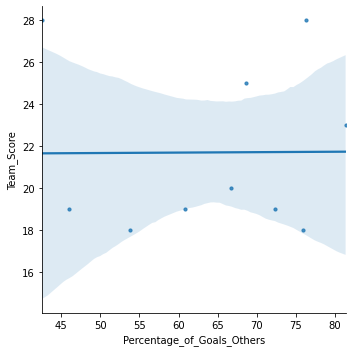

In [29]:
sns.lmplot('Percentage_of_Goals_Others'
           ,'Team_Score'
           ,data=df_goals_all_nations_with_team_score
           ,fit_reg=True
           ,scatter_kws={"marker": "D",
                        "s": 10})